# Pokemon Data science project

https://github.com/Maverickiastate/Pokemon_Database_HCI584.git

In [2]:
#Imports for project
import pandas as pd  # access to pandas-defined classes and their methods
#import matplotlib.pyplot as plt #use this for making graphs
#from scipy.stats import ttest_ind #use this for doing stats between group averages

### Some functions for move sets

In [3]:
# read in scraped move dict
import pickle
with open("moves.pkl", "rb") as file:
    move_dict = pickle.load(file)
move_dict


{'Zubat': ['absorb',
  'acrobatics',
  'agility',
  'air-cutter',
  'air-slash',
  'assurance',
  'astonish',
  'attract',
  'bide',
  'bite',
  'brave-bird',
  'captivate',
  'confuse-ray',
  'crunch',
  'curse',
  'defog',
  'dual-wingbeat',
  'endure',
  'facade',
  'feint-attack',
  'fly',
  'frustration',
  'giga-drain',
  'gust',
  'haze',
  'heat-wave',
  'hidden-power',
  'hypnosis',
  'leech-life',
  'mean-look',
  'nasty-plot',
  'natural-gift',
  'ominous-wind',
  'payback',
  'poison-fang',
  'protect',
  'pursuit',
  'quick-attack',
  'quick-guard',
  'rage',
  'rain-dance',
  'razor-wind',
  'rest',
  'return',
  'round',
  'secret-power',
  'shadow-ball',
  'sleep-talk',
  'sludge-bomb',
  'snatch',
  'snore',
  'steel-wing',
  'substitute',
  'sunny-day',
  'supersonic',
  'swift',
  'taunt',
  'thief',
  'u-turn',
  'uproar',
  'venom-drench',
  'venoshock',
  'whirlwind',
  'wing-attack',
  'zen-headbutt'],
 'Golbat': ['absorb',
  'acrobatics',
  'agility',
  'air-cut

In [4]:
def check_pokemon_moves(p, move_list, move_dict):
    '''Does pokemon p have all moves in move_list, based on move_dict?
       returns True/False or None if pokemon is not in move_dict'''
    if move_dict.get(p) == None:
        return None

    moves = move_dict[p]
    for move in move_list:
        if move not in moves: return False

    return True

# tests
print(check_pokemon_moves("Pokemokee", ["charm", "flash", "snore"], move_dict)) # None
print(check_pokemon_moves("Gloom", ["charm", "flash", "snore"], move_dict)) # True
print(check_pokemon_moves("Gloom", ["charm", "flash", "frizzle-frazzle"], move_dict)) # False

None
True
False


In [5]:
def has_pokemon_moves(p, move_list, move_dict):
    '''For pokemon p how many moves in move_list does it have (based on move_dict)?
       returns 0 ro n or None if pokemon is not in move_dict'''
    if move_dict.get(p) == None:
        return None
    
    num_moves = 0

    moves = move_dict[p]
    for move in move_list:
        if move in moves: 
            num_moves += 1

    return num_moves

print(has_pokemon_moves("Pokemokee", ["charm", "flash", "snore"], move_dict)) # None
print(has_pokemon_moves("Gloom", ["charm", "flash", "snore"], move_dict)) # 3
print(has_pokemon_moves("Gloom", ["charm", "flash", "frizzle-frazzle"], move_dict)) # 2

None
3
2


In [6]:
def which_pokemon_have_moves(move_list, move_dict):
    '''which pokemons have all moves from move_list (based on move_dict)?'''

    found_pokemons = []
    
    for p in move_dict:
        if check_pokemon_moves(p, move_list, move_dict) == True:
            found_pokemons.append(p)
   
    return found_pokemons


print(which_pokemon_have_moves(["charm", "flash", "snore", "aromatherapy"], move_dict)) 
print(which_pokemon_have_moves(["charm", "flash", "frizzle-frazzle"], move_dict)) 

['Vileplume', 'Petilil', 'Lilligant', 'Clefairy', 'Clefable', 'Spritzee', 'Aromatisse', 'Swirlix', 'Slurpuff', 'Chansey', 'Blissey', 'Cleffa', 'Happiny']
[]


In [7]:
# import the data from the "pokemondata" file
poke = "Pokemondata.csv"  # hardcoded (Since there is only one DB I am currently using)

df = pd.read_csv(poke)
display(df) # formatted, with leading index row

# this is NOT a dataframe, it's just a dict!
df2 = pd.read_pickle('moves.pkl') #Set moves to a second database 


,index,pokedex_number,name,german_name,generation,status,species,type_1,type_2,height_m,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,1,Bulbasaur,Bisasam,1,Normal,Seed Pokémon,Grass,Poison,0.7,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,2,Ivysaur,Bisaknosp,1,Normal,Seed Pokémon,Grass,Poison,1.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,3,Venusaur,Bisaflor,1,Normal,Seed Pokémon,Grass,Poison,2.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,4,3,Mega Venusaur,Bisaflor,1,Normal,Seed Pokémon,Grass,Poison,2.4,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,5,4,Charmander,Glumanda,1,Normal,Lizard Pokémon,Fire,NaN,0.6,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1041,896,Glastrier,Polaross,8,Sub Legendary,Wild Horse Pokémon,Ice,NaN,2.2,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,1042,897,Spectrier,Phantoross,8,Sub Legendary,Swift Horse Pokémon,Ghost,NaN,2.0,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,1043,898,Calyrex,Coronospa,8,Legendary,King Pokémon,Psychic,Grass,1.1,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,1044,898,Calyrex Ice Rider,Coronospa,8,Legendary,High King Pokémon,Psychic,Ice,2.4,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [8]:
#printed this for reference as I am doing case scenarios I have all the columns instead of going back to the file
print(df.columns)


Index(['index', 'pokedex_number', 'name', 'german_name', 'generation',
       'status', 'species', 'type_1', 'type_2', 'height_m', 'weight_kg',
       'abilities_number', 'ability_1', 'ability_2', 'ability_hidden',
       'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'catch_rate', 'base_friendship', 'base_experience',
       'growth_rate', 'egg_type_1', 'egg_type_2', 'percentage_male',
       'egg_cycles', 'against_normal', 'against_fire', 'against_water',
       'against_electric', 'against_grass', 'against_ice', 'against_fight',
       'against_poison', 'against_ground', 'against_flying', 'against_psychic',
       'against_bug', 'against_rock', 'against_ghost', 'against_dragon',
       'against_dark', 'against_steel', 'against_fairy'],
      dtype='object')


In [9]:
#Notes
#Read Headers
    #df.columns

#Read each Column
    #print(df[['Name', 'Type 1', 'HP']])

#Read Each Row
    #print(df.iloc[0:4])
    # for index, row in df.iterrows():
    #     print(index, row['Name'])
    #df.loc[df['Type 1'] == "Grass"]

#Read a specific location (R,C)
    #print(df.iloc[2,1])

#Sorting/Describing Data
    #df.sort_values(['Type 1', 'HP'], ascending=[1,0])

#Filtering data
    # new_df = df.loc[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison') & (df['HP'] > 70)]
    # new_df.reset_index(drop=True, inplace=True)
    # new_df
    # new_df.to_csv('filtered.csv')

#saving output to a desired file
    # df.to_csv('modified.csv', index=False)


# Building a VGC team
### VGC is the competitive format for official pokemon tournements. The format includes "teams" of six pokemon in a turn based scenario where players will select moves and once the turn starts the moves will play out based on speed. For the most part these competetions are best of three matches. Each match a player can bring four of their six pokemon per match. There is a pre-match lobby prior to each individual match where the player can plan and select the four. Typically a team is construct around a certain play style and selecting Pokemon that fit into that playstyle is vital. A Pokemon has a range of variables to them that can be changed and adapted. Pokemon all have unique typings, abilities, stats, natures, and damage that it can recieve. In addition to that you can further optimize a pokemon with items or stat modifers (Evs and IVs). However the main concerns with a pokemon is the first list of attributes. To add to this there are rulesets that restrict certain things like pokemon or items etc. 

### This project will show a mock process of how a user might use this database to start from a basic idea and progress to a strong idea ready for fine tuning. It is also working in a vaccumm assuming certain things and or ignoring things a typically player might consider. This is due limitations of the data. One asumption is that the ruleset allows for any combonation of team. Also there certain tradeoffs players have to make when building a team. There will never be a perfect team just one that is consistent. The ideal pokemon may not be the best at a single attribute but one of the best given other circumstances. Typically in team building the user is familar with the meta of the game. As in what is commonly being played. In this project usage stats were not collected. 

#### Depending on who you are, there are a many ways to build a team but the most basic approach would be selecting a playstyle and narrowing down into specific pokemon. That being said let's say a user wants to have a speed control team. That they want to control the speed of the battle so their Pokemon attack first. They are approaching this play style by using the move called "Trick Room". This move flips the speed order so that the slowest pokemon attacks first and the fastest attacks last. To begin let's find all pokemon that know "Trick Room" and start from there. For reference let's also see the average for each stat as a guide when deciding what pokemon to use.

In [11]:

# CH you're already creating a subset df on the fly and get its mean, so no need to pull out the same columns
# again as you only have those anyway 
average_total_points = df[['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed']].mean()
display(average_total_points)

total_points    439.353110
hp               70.067943
attack           80.476555
defense          74.670813
sp_attack        73.031579
sp_defense       72.298565
speed            68.807656
dtype: float64

In [12]:
trick_room = (which_pokemon_have_moves(["trick-room"], move_dict))
sorted(trick_room) #sorted to compare faster

['Abra',
 'Alakazam',
 'Aromatisse',
 'Articuno',
 'Audino',
 'Azelf',
 'Baltoy',
 'Beheeyem',
 'Bronzong',
 'Bronzor',
 'Calyrex',
 'Carbink',
 'Celebi',
 'Chandelure',
 'Claydol',
 'Cofagrigus',
 'Comfey',
 'Cresselia',
 'Dialga',
 'Diancie',
 'Dottler',
 'Duosion',
 'Dusclops',
 'Dusknoir',
 'Duskull',
 'Elgyem',
 'Espeon',
 'Espurr',
 'Exeggcute',
 'Exeggutor',
 'Frillish',
 'Gallade',
 'Gardevoir',
 'Gastly',
 'Gengar',
 'Gothita',
 'Gothitelle',
 'Gothorita',
 'Gourgeist',
 'Hatterene',
 'Haunter',
 'Indeedee',
 'Inkay',
 'Jellicent',
 'Jirachi',
 'Jynx',
 'Kadabra',
 'Kirlia',
 'Klinklang',
 'Lampent',
 'Litwick',
 'Lunala',
 'Lunatone',
 'Magearna',
 'Malamar',
 'Meowstic',
 'Mesprit',
 'Mew',
 'Mewtwo',
 'Mime Jr.',
 'Mimikyu',
 'Mr. Mime',
 'Mr. Rime',
 'Munna',
 'Musharna',
 'Natu',
 'Necrozma',
 'Nihilego',
 'Oranguru',
 'Orbeetle',
 'Palkia',
 'Phantump',
 'Porygon',
 'Porygon-Z',
 'Porygon2',
 'Pumpkaboo',
 'Ralts',
 'Rapidash',
 'Reuniclus',
 'Runerigus',
 'Sigilyph',
 '

#### Now we have a list of all pokemon that now the move let's make a list that also looks at the slowest Pokemon in the game and see if there is some common pokemon in the two lists. 

In [13]:
slow_poke = df.sort_values(by="speed", ascending=True)
display(slow_poke[['pokedex_number','name', 'total_points','hp', 'attack', 'sp_attack', 'defense', 'sp_defense', 'speed']].head(20))

,pokedex_number,name,total_points,hp,attack,sp_attack,defense,sp_defense,speed
262,213,Shuckle,505,20,10,10,230,230,5
533,446,Munchlax,390,135,85,40,40,85,5
903,771,Pyukumuku,410,55,60,30,130,130,5
701,597,Ferroseed,305,44,50,24,91,86,10
965,829,Gossifleur,250,40,40,40,60,60,10
394,328,Trapinch,290,45,100,45,45,45,10
524,438,Bonsly,290,50,80,10,95,45,10
941,805,Stakataka,570,61,131,53,211,101,13
324,266,Silcoon,205,50,35,25,55,25,15
887,755,Morelull,285,40,35,65,55,75,15


In [15]:
slow_pokes_lst = slow_poke["name"].values
slow_pokes_lst

in_trickroom  = []

for p in slow_pokes_lst:
    if p in trick_room:
        in_trickroom.append(p)

print(in_trickroom)

['Stakataka', 'Slowpoke', 'Litwick', 'Solosis', 'Spritzee', 'Bronzor', 'Munna', 'Duskull', 'Dusclops', 'Aromatisse', 'Musharna', 'Hatterene', 'Dottler', 'Yamask', 'Duosion', 'Reuniclus', 'Runerigus', 'Slowking', 'Elgyem', 'Cofagrigus', 'Slowbro', 'Bronzong', 'Phantump', 'Ralts', 'Beheeyem', 'Porygon', 'Exeggcute', 'Frillish', 'Gothita', 'Inkay', 'Dusknoir', 'Kirlia', 'Audino', 'Carbink', 'Diancie', 'Gothorita', 'Exeggutor', 'Baltoy', 'Lampent', 'Trevenant', 'Mime Jr.', 'Porygon2', 'Jellicent', 'Oranguru', 'Magearna', 'Gothitelle', 'Smoochum', 'Espurr', 'Mr. Rime', 'Solrock', 'Natu', 'Lunatone', 'Woobat', 'Malamar', 'Claydol', 'Necrozma', 'Mesprit', 'Calyrex', 'Chandelure', 'Gallade', 'Gardevoir', 'Gastly', 'Cresselia', 'Articuno', 'Abra', 'Orbeetle', 'Klinklang', 'Mr. Mime', 'Dialga', 'Porygon-Z', 'Uxie', 'Haunter', 'Jynx', 'Xatu', 'Mimikyu', 'Lunala', 'Sigilyph', 'Solgaleo', 'Comfey', 'Palkia', 'Jirachi', 'Victini', 'Celebi', 'Mew', 'Nihilego', 'Kadabra', 'Rapidash', 'Gengar', 'Espeon

In [27]:
# new df with only those pokemons from the in_trickroom list
df_in_trickroom = df[ df["name"].isin(in_trickroom)]

# sort by speed and re-order columns
df_in_trickroom[["name", "speed", 'total_points','hp', 'attack', 'sp_attack', 'defense', 'sp_defense']].sort_values(by=['speed'])

,name,speed,total_points,hp,attack,sp_attack,defense,sp_defense
941,Stakataka,13,570,61,131,53,211,101
103,Slowpoke,15,315,90,65,40,65,40
681,Solosis,20,290,45,30,105,40,50
711,Litwick,20,275,50,30,65,55,55
797,Spritzee,23,341,78,52,63,60,65
...,...,...,...,...,...,...,...,...
577,Azelf,115,580,75,125,125,70,70
156,Starmie,115,520,60,75,100,85,85
645,Whimsicott,116,480,60,67,77,85,75
83,Alakazam,120,500,55,50,135,45,95


#### Now comparing the two list the first pokemon to know "Trick Room" while moving down the speed table, in ascending order based on the speed stat, is Stakataka. Let's set that as the first pokemon on the team. Before fine tuning each individual pokemon with every aspect, let's complete the rest of the team. Once the user is satisfied with the pokemon the user can reiterate through the team.

###### Team member #1: Stakataka

#### Typically in a trick room team there will be several members that know the move "Trick Room" in case the main pokemon does not fit well into an oppoents team. To begin that process a user might look at the flaws of the primary pokemon and find a secondary pokemon that does not have those same flaws. That way in matchups were the primary is weak the secondary should fair better. 

In [30]:
display(df[df["name"] == "Stakataka"]) # pull out using name (not id!)

,index,pokedex_number,name,german_name,generation,status,species,type_1,type_2,height_m,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
941,942,805,Stakataka,Muramura,7,Sub Legendary,Rampart Pokémon,Rock,Steel,5.5,...,4.0,0.25,0.5,0.5,0.5,1.0,0.5,1.0,1.0,0.5


#### Looking at the combat relevant stats of the first member, there are some flaws it has. First off the member has a low hp stat. It also has a low speed stat but remember the user wants that to be low. (see the average stat reference table above for more context on what stats are low or high on average) This member also has a 4x weakness to attacks that are either fighting or ground. This means those moves will do 4x the damage it normally would do. This is because of Stakataka's typing of Rock and Steel. In conclusion a secondary trick room pokemon should not have weakness to fighting or ground and potentially has a higher hp stat. 

In [31]:
slow_poke_weakness = slow_poke.sort_values(by = ['against_fight', 'against_ground'], ascending=[True, True], na_position='first')

display(slow_poke_weakness[['pokedex_number', 'name', 'type_1', 'type_2', 'weight_kg',
'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
'speed',  'against_fight','against_ground']].head(30))



,pokedex_number,name,type_1,type_2,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,against_fight,against_ground
426,355,Duskull,Ghost,NaN,15.0,295,20,40,90,30,90,25,0.0,0.0
351,292,Shedinja,Bug,Ghost,1.2,236,1,90,45,30,30,40,0.0,0.0
510,425,Drifloon,Ghost,Flying,1.2,348,90,50,34,60,44,70,0.0,0.0
122,92,Gastly,Ghost,Poison,0.1,310,30,35,30,100,35,80,0.0,0.0
511,426,Drifblim,Ghost,Flying,15.0,498,150,80,44,90,54,80,0.0,0.0
247,200,Misdreavus,Ghost,NaN,1.0,435,60,60,60,85,85,85,0.0,0.0
583,487,Giratina Origin Forme,Ghost,Dragon,650.0,680,150,120,100,120,100,90,0.0,0.0
569,479,Rotom,Electric,Ghost,0.3,440,50,50,77,95,77,91,0.0,0.0
869,741,Oricorio Sensu Style,Ghost,Flying,3.4,476,75,70,70,98,70,93,0.0,0.0
123,93,Haunter,Ghost,Poison,0.1,405,45,50,45,115,55,95,0.0,0.0


In [35]:
# Finding Trevenant by just going down the table is not very data sciency :)

# Also, please just use a list for the column names!
col_names=['pokedex_number', 'name', 'type_1', 'type_2', 'weight_kg','total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed']

# No idea what is good in your mind but why not impose some simple requirements and the sort by 1 or more columns?
good = df.query("total_points > 450 and attack > 100")
good = good.sort_values(by="speed", ascending=False)
good[col_names]


,pokedex_number,name,type_1,type_2,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
928,795,Pheromosa,Bug,Fighting,25.0,570,71,137,37,137,37,151
182,142,Mega Aerodactyl,Rock,Flying,79.0,615,80,135,85,70,95,150
466,386,Deoxys Normal Forme,Psychic,NaN,60.8,600,50,150,50,150,50,150
467,386,Deoxys Attack Forme,Psychic,NaN,60.8,600,50,180,20,180,20,150
1028,888,Zacian Crowned Sword,Fairy,Steel,355.0,720,92,170,115,80,115,148
...,...,...,...,...,...,...,...,...,...,...,...,...
834,713,Avalugg,Ice,NaN,505.0,514,95,117,184,44,46,28
623,526,Gigalith,Rock,NaN,260.0,515,85,135,130,60,80,25
693,589,Escavalier,Bug,Steel,33.0,495,70,135,105,60,105,20
389,323,Mega Camerupt,Fire,Ground,320.5,560,70,120,100,145,105,20


#### Looking at this table the first result from the sorting shows Duskull. It has imunities to both ground and fighting meaning it takes no damage from either of those attack types. Referencing back to the Pokemon that can learn Trick room, Duskull is on of those pokemon. However Looking at the individual stats of Duskull it is a fragile Pokemon with low defensive stats (HP, Defense, and Special Defense). Let's keep this in mind but let's move down this list to find a better suited pokemon. The user final reaches Trevenant, it can use the move trick room, it has decent stats, and it does not have 4x weakness to the types Stakataka did. However it still takes half damage from ground but that is better than 4x. That being said the portion of the team that sets up Trick Room is in place and covers some different matchups.



###### Team member #1: Stakataka (Primary Trick Room Pokemon)
###### Team member #2: Trevenant (Secondary Trick Room Pokemon)

#### Now that the support Pokemon are selected (Trick Room Pokemon) the user wants to add the damage dealers to the team. That being said the damage dealers on a trick room team need to be slow to attack first. Remeber in Trick room the slowest pokemon attacks first and the damage dealers will be frail. They need to safely deal damage without taking any. Ideally they will faint the opponts Pokemon before they can attack back. To begin the search the user will look at all the Pokemon sorted from highest attack/sp attack to lowest. Referencing back to the average of all Pokemon stats, these results will only include Pokemon under 65. The average being approximately 68. Typically a damage dealing Pokemon does one attack style only. If a Pokemon has really strong phyiscal moves (attack) then there is no need for that Pokemon to have a stong special attack stat as well. Therefor the user will look at both attack stats and pick a single one from each. This is to account for an opponet having Pokemon with varying defensive stats. Basically a team should have both attack stats for more coverage in matchups.

In [36]:
slow_poke_damage_p = df.sort_values(by = ['attack'], ascending = [False], na_position = 'first')
slow_damage_p = slow_poke_damage_p.query("speed < 65")
display(slow_damage_p[col_names].head(10))

slow_poke_damage_s = df.sort_values(by = ['sp_attack'], ascending = [False], na_position = 'first')
slow_damage_s = slow_poke_damage_s.query("speed < 65")
display(slow_damage_s[col_names].head(10))

,pokedex_number,name,type_1,type_2,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
1043,898,Calyrex Ice Rider,Psychic,Ice,809.1,680,100,165,150,85,130,50
492,409,Rampardos,Rock,NaN,102.5,495,97,165,60,65,50,58
795,681,Aegislash Blade Forme,Steel,Ghost,53.0,520,60,150,50,150,50,60
1040,896,Glastrier,Ice,NaN,800.0,580,100,145,130,65,110,30
945,809,Melmetal,Steel,NaN,800.0,600,135,143,143,80,65,34
878,746,Wishiwashi School Form,Water,NaN,78.6,620,45,140,130,140,135,30
368,306,Mega Aggron,Steel,NaN,395.0,630,70,140,230,60,80,50
553,464,Rhyperior,Ground,Rock,282.8,535,115,140,130,55,55,40
632,534,Conkeldurr,Fighting,NaN,87.0,505,105,140,95,55,65,45
623,526,Gigalith,Rock,NaN,260.0,515,85,135,130,60,80,25


,pokedex_number,name,type_1,type_2,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
227,181,Mega Ampharos,Electric,Dragon,61.5,610,90,95,105,165,110,45
795,681,Aegislash Blade Forme,Steel,Ghost,53.0,520,60,150,50,150,50,60
1001,864,Cursola,Ghost,NaN,0.4,510,60,95,50,145,130,30
863,738,Vikavolt,Bug,Electric,45.0,500,77,70,90,145,75,43
389,323,Mega Camerupt,Fire,Ground,320.5,560,70,120,100,145,105,20
878,746,Wishiwashi School Form,Water,NaN,78.6,620,45,140,130,140,135,30
656,555,Darmanitan Zen Mode,Fire,Psychic,92.9,540,105,30,105,140,105,55
995,858,Hatterene,Psychic,Fairy,5.0,510,57,90,95,136,103,29
913,780,Drampa,Normal,Dragon,185.0,485,78,60,85,135,91,36
549,460,Mega Abomasnow,Grass,Ice,185.0,594,90,132,105,132,105,30


In [39]:
# why not sort by both?
slow_dam = df.sort_values(by = ['attack', "sp_attack"], ascending = [False, False], na_position = 'first')
slow_dam.query("speed < 65")[col_names].head(10)

,pokedex_number,name,type_1,type_2,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
1043,898,Calyrex Ice Rider,Psychic,Ice,809.1,680,100,165,150,85,130,50
492,409,Rampardos,Rock,NaN,102.5,495,97,165,60,65,50,58
795,681,Aegislash Blade Forme,Steel,Ghost,53.0,520,60,150,50,150,50,60
1040,896,Glastrier,Ice,NaN,800.0,580,100,145,130,65,110,30
945,809,Melmetal,Steel,NaN,800.0,600,135,143,143,80,65,34
878,746,Wishiwashi School Form,Water,NaN,78.6,620,45,140,130,140,135,30
368,306,Mega Aggron,Steel,NaN,395.0,630,70,140,230,60,80,50
553,464,Rhyperior,Ground,Rock,282.8,535,115,140,130,55,55,40
632,534,Conkeldurr,Fighting,NaN,87.0,505,105,140,95,55,65,45
623,526,Gigalith,Rock,NaN,260.0,515,85,135,130,60,80,25


In [40]:
# or maybe switch order?
slow_dam = df.sort_values(by = ["sp_attack",'attack'], ascending = [False, False], na_position = 'first')
slow_dam.query("speed < 65")[col_names].head(10)

# Never mind, I guess double sorting is no different ...

,pokedex_number,name,type_1,type_2,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
227,181,Mega Ampharos,Electric,Dragon,61.5,610,90,95,105,165,110,45
795,681,Aegislash Blade Forme,Steel,Ghost,53.0,520,60,150,50,150,50,60
389,323,Mega Camerupt,Fire,Ground,320.5,560,70,120,100,145,105,20
1001,864,Cursola,Ghost,NaN,0.4,510,60,95,50,145,130,30
863,738,Vikavolt,Bug,Electric,45.0,500,77,70,90,145,75,43
878,746,Wishiwashi School Form,Water,NaN,78.6,620,45,140,130,140,135,30
656,555,Darmanitan Zen Mode,Fire,Psychic,92.9,540,105,30,105,140,105,55
995,858,Hatterene,Psychic,Fairy,5.0,510,57,90,95,136,103,29
913,780,Drampa,Normal,Dragon,185.0,485,78,60,85,135,91,36
549,460,Mega Abomasnow,Grass,Ice,185.0,594,90,132,105,132,105,30


#### Looking at the first table the user has a list of the the slowest phyiscal attackers (attack). The role of damage dealers are pretty straight forward, do damage. However this team being constructed is also concerned about speed since it is a Trick Room team. The sorting prevent any pokemon from appearing above the average speed stat so any one on the list would be fine for this scenario. In real life scenario a player would also need to consider what would happen if they were to face another Trick room team. In those scenarios one would need to be even slower or just not use the move Trick Room to begin because their Pokemon would actually be faster in that instance. This would be known as speed creeping. An example of this would be choosing a pokemon 1 point slower or fast to ensure speed priority over a commonly used pokemon. However, that is a little beyound the scope of this tool as usage stats are not implemented.

#### Looking at the top choices from both attack types the user has, Calyrex Ice Rider and Mega Ampharos (my personal favorite Pokemon). Similarly to how the user checked how their Trick Room Pokemon took damage from each type, the user does the same with the damage dealers. Most likely every match both damage dealers will be two of the four Pokemon being brough it is safe to average both of their weaknesses. This way the user can see what their damage dealers are most suseptiable to. (This will lead to process of adding the support Pokemon with the final two slots of the team.) Anything over 1.0 indicates extra damage being taken. From Calyrex Ice Rider and Mega Ampharos the user sees that on average fire, ice, and steel deal 125% damage. Ground, bug, rock, ghost, dragon, dark, and fairy deal 200% damage. That is not good 10 of the 18 types are dealing additional damage to your damage dealers.

###### Team member #1: Stakataka (Primary Trick Room Pokemon)
###### Team member #2: Trevenant (Secondary Trick Room Pokemon)
###### Team member #3: Calyrex Ice Rider (Attack damage dealer Pokemon)
###### Team member #4: Mega Ampharos (Special attack damage dealer Pokemon)

In [127]:
# Fine, if you prefer to see the pokemon and a column, use icloc, but please use colum_names ...
display(df.iloc[1043][['name','against_normal', 'against_fire', 'against_water',
       'against_electric', 'against_grass', 'against_ice', 'against_fight',
       'against_poison', 'against_ground', 'against_flying', 'against_psychic',
       'against_bug', 'against_rock', 'against_ghost', 'against_dragon',
       'against_dark', 'against_steel', 'against_fairy']])
display(df.iloc[227][['name','against_normal', 'against_fire', 'against_water',
       'against_electric', 'against_grass', 'against_ice', 'against_fight',
       'against_poison', 'against_ground', 'against_flying', 'against_psychic',
       'against_bug', 'against_rock', 'against_ghost', 'against_dragon',
       'against_dark', 'against_steel', 'against_fairy']])

# I don't get what that is supposed to do (?)
bana = (df.iloc[227] + df.iloc[1043])
display(bana[30:]/2)

name                Calyrex Ice Rider
against_normal                    1.0
against_fire                      2.0
against_water                     1.0
against_electric                  1.0
against_grass                     1.0
against_ice                       0.5
against_fight                     1.0
against_poison                    1.0
against_ground                    1.0
against_flying                    1.0
against_psychic                   0.5
against_bug                       2.0
against_rock                      2.0
against_ghost                     2.0
against_dragon                    1.0
against_dark                      2.0
against_steel                     2.0
against_fairy                     1.0
Name: 1043, dtype: object

name                Mega Ampharos
against_normal                1.0
against_fire                  0.5
against_water                 0.5
against_electric             0.25
against_grass                 0.5
against_ice                   2.0
against_fight                 1.0
against_poison                1.0
against_ground                2.0
against_flying                0.5
against_psychic               1.0
against_bug                   1.0
against_rock                  1.0
against_ghost                 1.0
against_dragon                2.0
against_dark                  1.0
against_steel                 0.5
against_fairy                 2.0
Name: 227, dtype: object

against_normal        1.0
against_fire         1.25
against_water        0.75
against_electric    0.625
against_grass        0.75
against_ice          1.25
against_fight         1.0
against_poison        1.0
against_ground        1.5
against_flying       0.75
against_psychic      0.75
against_bug           1.5
against_rock          1.5
against_ghost         1.5
against_dragon        1.5
against_dark          1.5
against_steel        1.25
against_fairy         1.5
dtype: object

#### From here a user has a few options. They could reassess which damage dealers to use, potentially they switch out Mega Ampharos for something else. They could move on to the stage of adding support Pokemon that help protect the damage dealers. Then there is also the option of the user doing some tradeoffs and accepting the faults, ex. "yes my damage dealers take extra damage from bug types but bug types are never used so I do not need to account for that". This is also where some of the limitations of the work comes into play at this point many factors are coming in that are not currently handled. These factors include damgage dealt instead of damage taken, ovarall meta, typage of the moves themselves. Mega Ampharos can learn moves outside of it's typings Electric and Dragon, for example, it can learn flamethrower which is fire type move. Although Ampharos takes extra damage from Ice type moves, it can use a move (flamethrower) that does extra damage to Ice type Pokemon. This data also does not factor in data about abilites and how those interact with damage or items or terrians. This list can go on. As stated before there is not such thing as a perfect team. 

First user case scenario: (Scenario with 2 filters)

This user wants to know the fastest fire type pokemon. Pokemon have the possibility of having 2 types. A primary and a secondary. Either way it is fire type so the search needs to include pokemon that have fire as either of it's typings. With there being over 1000 pokemon to narrow the search down only pokemon that fit the criteria of being a fire type and have a speed of at least 100. Taking those results, sort them in a descending order based on speed. Since the user is only interested in speed and typing the results print the pokemon's name, types, and speed. The user finds that Galarian Darmanitan in Zen mode is the fastest fire type pokemon. To give complete data on the winner of the query the full data for the pokemon is printed out.

In [ ]:
#First user case scenario: Fastest fire type
fast_fire = df.query("type_1 == 'Fire' or type_2 == 'Fire'")
most_fast = fast_fire.query("speed > 100")
final_fast = most_fast.sort_values(by="speed", ascending=False)
display(final_fast[['name', 'type_1', 'type_2','speed']])
display(final_fast.iloc[0])

Second user case scenario: Finding the pokemon with the best defenseive stats (must be a normal status pokemon)

In [ ]:
#Second user case scenario: Best defense pokemon
df['total_defense'] = (df['hp'] + df['defense'] + df['sp_defense'])
normal_status = df.query("status == 'Normal'")
total_def = normal_status.sort_values(by="total_defense", ascending=False)
display(total_def[['pokedex_number','name', 'total_defense', 'hp', 'defense', 'sp_defense']].head(20))
display(total_def.iloc[0])

Third user case scenario: Finding the pokemon with the best offensive stats (must be a normal status pokemon)

In [ ]:
#Third user case scenario: Best offense pokemon
#Second user case scenario: Best defense pokemon
df['total_offense'] = (df['attack'] + df['sp_attack'] + df['speed'])
normal_status = df.query("status == 'Normal'")
total_off = normal_status.sort_values(by="total_offense", ascending=False)
display(total_off[['pokedex_number','name', 'total_offense', 'attack', 'sp_attack', 'speed']].head(20))
display(total_off.iloc[0])

Average stats per generation: Is a certain generation more powerful on average than another generation?

There is talk amongst the community if one generation is better than another. Generation meaning each game that comes out so Generation 1 is the intial game. Generation 2 is the second and adds another set of Pokemon to the ever growing list. By generation 8 we are up to 1045 variants but is one generation "better" than another? What this table does is average all that stats of the Pokemon and groups them by what generation lable they have in their generation column. This does not show number of Pokemon and it is not a statistical test. However statesment like "the average stat total of generation 1 Pokemon are in fact not the best". There are some fans that potentially for nogstalgic reasons find generation 1 to be the best. By stats averages that simply is not true.

In [56]:
#Average stats per generation
average_stats_gen = df.groupby("generation").mean("total_points")
display(average_stats_gen [['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed']] )

,total_points,hp,attack,defense,sp_attack,sp_defense,speed
generation,,,,,,,
1,424.104167,64.760417,77.302083,71.005208,69.927083,68.598958,72.510417
2,419.140187,71.476636,71.869159,73.822430,66.121495,74.336449,61.514019
3,436.006061,66.806061,81.030303,74.048485,75.600000,71.139394,67.381818
4,459.016529,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843
5,435.157895,72.292398,82.976608,72.269006,70.929825,68.426901,68.263158
6,442.552941,69.882353,77.188235,77.023529,75.258824,75.200000,68.000000
7,459.232323,71.464646,87.313131,79.202020,77.848485,75.555556,67.848485
8,455.933333,75.200000,83.571429,76.961905,74.904762,74.057143,71.238095


What type is has the best adavantages on the damage chart (on average)
The developors have made 18 different types that are suppose to perform checks and balances with one another. Fire is strong to grass. Grass is strong to water. Water is strong to fire. That is just between 3 types and there are 18 but the same idea applies. What this table below shows is the average damage taken from every Pokemon. For example, on average a random Pokemon will take .86 or 86% damage from a Normal type move. In theroy if the types were evenly balanced should they not all take close to 1.0? I am not sure what "close" actually is in this scenario potentially the range of 86% to 170% is "close" enough.

In [128]:
df.agg(
    {
        "against_normal": ["mean", "min", "max", "skew"],
        "against_fire": ["mean", "min", "max", "skew"],
        "against_water": ["mean", "min", "max", "skew"],
        "against_electric": ["mean", "min", "max", "skew"],
        "against_ice": ["mean", "min", "max", "skew"],
        "against_fight": ["mean", "min", "max", "skew"],
        "against_poison": ["mean", "min", "max", "skew"],
        "against_ground": ["mean", "min", "max", "skew"],
        "against_flying": ["mean", "min", "max", "skew"],
        "against_psychic": ["mean", "min", "max", "skew"],
        "against_bug": ["mean", "min", "max", "skew"],
        "against_rock": ["mean", "min", "max", "skew"],
        "against_ghost": ["mean", "min", "max", "skew"],
        "against_dragon": ["mean", "min", "max", "skew"],
        "against_dark": ["mean", "min", "max", "skew"],
        "against_steel": ["mean", "min", "max", "skew"],
        "against_fairy": ["mean", "min", "max", "skew"],
    }
)


,against_normal,against_fire,against_water,against_electric,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
mean,0.86866,1.126316,1.050718,1.035646,1.675598,1.075120,0.953110,1.082297,1.168900,0.977273,0.998086,1.238278,1.018660,0.977033,1.071053,0.981579,1.091148
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
max,1.00000,4.000000,4.000000,4.000000,125.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000
skew,-2.06260,1.571443,1.875685,0.930440,15.861433,1.300646,1.199831,1.098094,1.682816,0.780913,1.717807,1.868241,0.527523,0.183916,1.614979,1.797846,2.036002


Average stats per typing: The intention with this is to see what average stats look like per typing. Since the data is formated into type 1 and type 2 both are displayed below.
I always thought that having, say, Fire as Type 1 or Type 2 did not really matter. However is that true? On average a Fire type 1 will have an approx. Stat total of 455 while a Fire type 2 will have an approx. stat total of 490. However it should be noted that not all Pokemon have two types some only have one. There are 1045 Pokemon variants in this dataest so at least 1045 type 1 pokemon. Of those 1045, 492 do not have a second type. Roughly 47% are mono-typed.

In [129]:
#Average stats Type 1
average_stats_gen = df.groupby("type_1").mean("total_points")
display(average_stats_gen [['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed']])

,total_points,hp,attack,defense,sp_attack,sp_defense,speed
type_1,,,,,,,
Bug,384.617284,57.024691,71.074074,71.802469,56.382716,65.074074,63.259259
Dark,434.543478,70.065217,81.934783,66.391304,71.086957,68.369565,76.695652
Dragon,536.365854,85.243902,107.024390,83.926829,91.731707,84.097561,84.341463
Electric,451.435484,62.241935,74.983871,66.241935,89.548387,71.661290,86.758065
Fairy,439.272727,72.954545,68.090909,70.545455,78.954545,89.181818,59.545455
Fighting,446.404762,72.928571,102.928571,73.666667,57.333333,68.214286,71.333333
Fire,455.015385,69.430769,85.400000,68.107692,86.415385,71.292308,74.369231
Flying,440.000000,69.625000,75.125000,64.375000,73.875000,70.000000,87.000000
Ghost,444.071429,64.809524,73.976190,79.952381,83.476190,78.809524,63.047619


In [130]:
#Average stats Type 2
average_stats_gen = df.groupby("type_2").mean("total_points")
display(average_stats_gen [['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed']])

,total_points,hp,attack,defense,sp_attack,sp_defense,speed
type_2,,,,,,,
Bug,377.000000,57.333333,72.222222,65.444444,60.000000,72.111111,49.888889
Dark,485.370370,77.000000,109.666667,71.814815,80.629630,69.777778,76.481481
Dragon,544.531250,92.812500,93.875000,93.281250,102.812500,84.406250,77.343750
Electric,437.909091,76.181818,80.272727,85.454545,74.272727,66.454545,55.272727
Fairy,441.634146,64.365854,69.097561,75.439024,81.658537,84.000000,67.073171
Fighting,521.000000,80.125000,112.343750,83.312500,80.250000,78.656250,86.312500
Fire,490.294118,74.470588,81.352941,78.058824,98.647059,77.470588,80.294118
Flying,455.767857,71.946429,80.883929,68.919643,77.098214,71.767857,85.151786
Ghost,471.576923,66.269231,89.923077,82.038462,82.884615,80.807692,69.653846


In [42]:
print(df.isnull().sum()) # explain???
492/1045


index                 0
pokedex_number        0
name                  0
german_name           0
generation            0
status                0
species               0
type_1                0
type_2              492
height_m              0
weight_kg             1
abilities_number      0
ability_1             3
ability_2           529
ability_hidden      232
total_points          0
hp                    0
attack                0
defense               0
sp_attack             0
sp_defense            0
speed                 0
catch_rate           18
base_friendship     115
base_experience     120
growth_rate           1
egg_type_1            3
egg_type_2          760
percentage_male     173
egg_cycles            1
against_normal        0
against_fire          0
against_water         0
against_electric      0
against_grass         0
against_ice           0
against_fight         0
against_poison        0
against_ground        0
against_flying        0
against_psychic       0
against_bug     

0.47081339712918663

Correlation between various attributes

As stated in the previous exercise. Pokemon can have up to two typings. However are some types more frequently used as Type 1 instead of Type 2? Also is there a correlation to the number of occurences between the two? If there are a lot of pokemon with Water as type 1 are there few with water as type 2? 

Flying is the most uncommon type 1 however it is the most common type 2. Doing a simple correlation between the two we find a weak negative correlation between the two of .56. Not significant but there are mild trend you can see in the type deployment from the developors. 

In [131]:
#Number of pokemon per type
count = df['type_1'].value_counts()
count2 = df['type_2'].value_counts()
print(count)
print(count2)

t1_vs_t2 = count.corr(count2)
print(format(t1_vs_t2, '.4f'))

Water       134
Normal      115
Grass        91
Bug          81
Psychic      81
Fire         65
Electric     62
Rock         60
Dark         46
Ghost        42
Fighting     42
Poison       41
Ground       41
Dragon       41
Ice          37
Steel        36
Fairy        22
Flying        8
Name: type_1, dtype: int64
Flying      112
Fairy        41
Psychic      40
Ground       39
Poison       38
Steel        35
Fighting     32
Dragon       32
Grass        28
Dark         27
Ghost        26
Ice          20
Water        20
Fire         17
Rock         15
Normal       11
Electric     11
Bug           9
Name: type_2, dtype: int64
-0.5620


As a final exercise an correlation table was made between all the non-string data columns from the data set. Looking for instances above .75/below -.75 (strong relationships). There is only one and that is between base experience and total points. This makes sense given the game mechanics. The more experience a pokemon earns the higher their stats become. There are a few more instances of moderate relationships (.5-.75 or (-0.5)-(-0.75)). Weighe and height fall into this category which makes sense. Egg cycles and number of possible abilities have a negative relationship. To better explain, egg cycles basically means the stonger the pokemon the bigger the egg cycle. Number of abilites should in theroy go up as well since more ability options typically is a good thing. I manually started looking through the data and found that all high egg values belong to higher rarity pokemon. Higher rarity pokemon also typically only have 1 maybe 2 abilites. After discovering that this made a lot more sense. There is also several relationships between total points and each individual one in this relationship bracket but that makes sense since total points is a cummulative data point from the other stats. There was relationship between Total points and catch rate. The higher the total stats of a pokemon the harder they are to capture. Lastly the most interesting one to me was the relationship between base friendship and egg cycles at -.56. If you remeber egg cycles are how long it takes for an egg to hatch. The strong the pokemon the longer it takes to hatch. However the longer the egg cycle, and therfor the stonger the pokemon, the less friendly the pokemon is towards you. Which is werid since the player is caring for it longer but then again this is a game.

In [136]:
display(df[[ 'name', 'generation', 'status', 'species', 'type_1', 'type_2', 'height_m', 'weight_kg','abilities_number', 
'ability_1', 'ability_2', 'ability_hidden','total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed', 'catch_rate', 'base_friendship', 
'base_experience','growth_rate', 'egg_type_1', 'egg_type_2', 'percentage_male','egg_cycles']].corr())

,generation,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,percentage_male,egg_cycles
generation,1.000000,0.055697,0.084619,-0.139946,0.091050,0.098174,0.088075,0.063270,0.065377,0.051344,0.002355,-0.067214,-0.137418,0.071540,-0.023382,0.187932
height_m,0.055697,1.000000,0.649098,-0.169649,0.374311,0.374797,0.205505,0.305927,0.202550,0.308383,0.137067,-0.305905,-0.360000,0.493568,0.044297,0.241525
weight_kg,0.084619,0.649098,1.000000,-0.237923,0.477182,0.440053,0.426925,0.469833,0.236694,0.302330,0.049318,-0.292317,-0.417488,0.437577,0.041955,0.441486
abilities_number,-0.139946,-0.169649,-0.237923,1.000000,-0.432820,-0.177255,-0.328223,-0.247016,-0.396759,-0.292770,-0.280959,0.359376,0.291510,-0.413007,-0.181521,-0.500926
total_points,0.091050,0.374311,0.477182,-0.432820,1.000000,0.650568,0.733028,0.629656,0.732795,0.719940,0.561368,-0.727788,-0.327835,0.929630,0.115900,0.542124
hp,0.098174,0.374797,0.440053,-0.177255,0.650568,1.000000,0.443752,0.299977,0.371185,0.392835,0.189705,-0.472134,-0.141498,0.652145,-0.027093,0.388345
attack,0.088075,0.205505,0.426925,-0.328223,0.733028,0.443752,1.000000,0.456565,0.369529,0.266685,0.373712,-0.529661,-0.310071,0.639279,0.199572,0.386376
defense,0.063270,0.305927,0.469833,-0.247016,0.629656,0.299977,0.456565,1.000000,0.222737,0.544896,0.004664,-0.442251,-0.202479,0.528211,0.024300,0.280860
sp_attack,0.065377,0.202550,0.236694,-0.396759,0.732795,0.371185,0.369529,0.222737,1.000000,0.510727,0.445268,-0.533384,-0.277883,0.701748,0.113348,0.431873
sp_defense,0.051344,0.308383,0.302330,-0.292770,0.719940,0.392835,0.266685,0.544896,0.510727,1.000000,0.226562,-0.518144,-0.162607,0.681539,-0.008307,0.346292


Histogram of the distrubution of the total stat points the pokemon have. Intially down with all pokemon but later was broken down by status.

array([[<AxesSubplot:title={'center':'total_points'}>]], dtype=object)

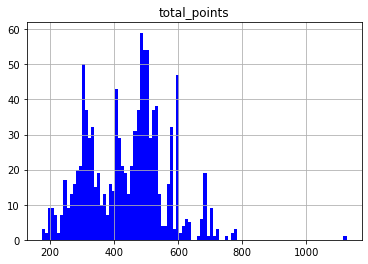

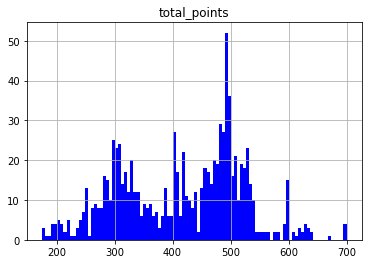

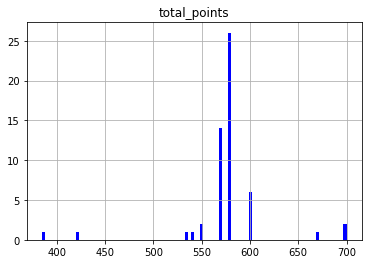

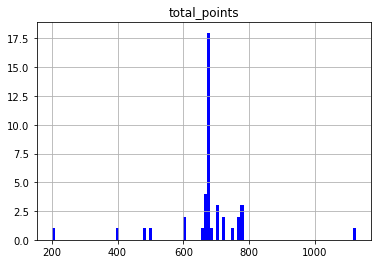

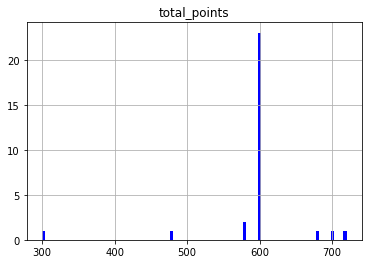

In [43]:
df.hist(column='total_points', bins=100, grid=True, rwidth=200, color='blue')

normal_total = df.query("status == 'Normal'")
normal_total.hist(column='total_points', bins=100, grid=True, rwidth=200, color='blue')

sub_legendary_total = df.query("status == 'Sub Legendary'")
sub_legendary_total.hist(column='total_points', bins=100, grid=True, rwidth=200, color='blue')

legendary_total = df.query("status == 'Legendary'")
legendary_total.hist(column='total_points', bins=100, grid=True, rwidth=200, color='blue')

mythical_total = df.query("status == 'Mythical'")
mythical_total.hist(column='total_points', bins=100, grid=True, rwidth=200, color='blue')

make each seperate
tile them
make the x axis the same level (min and max. make graph wider if you could)
